In [105]:
%load_ext autoreload
%autoreload 2
%matplotlib ipympl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [106]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
from analysis_functions import dt_from_measurement_dir, gaussian_from, gaussian

In [107]:
plt.style.use('ggplot')

In [108]:
base_dir = 'Breakdown_Measurements_LED'
sub_dirs = os.listdir(base_dir)
sub_dirs = sub_dirs[1:]

In [109]:
led10 = dt_from_measurement_dir(os.path.join(base_dir,sub_dirs[4])) * 1e6
led20 = dt_from_measurement_dir(os.path.join(base_dir,sub_dirs[2])) * 1e6
led50 = dt_from_measurement_dir(os.path.join(base_dir,sub_dirs[3])) * 1e6
led100 = dt_from_measurement_dir(os.path.join(base_dir,sub_dirs[0])) * 1e6

In [111]:
mean_10, std_10, t_10, gauss_10 = gaussian_from(led10)
mean_20, std_20, t_20, gauss_20 = gaussian_from(led20)
mean_50, std_50, t_50, gauss_50 = gaussian_from(led50)
mean_100, std_100, t_100, gauss_100 = gaussian_from(led100)

In [112]:
from scipy.integrate import quadrature
from scipy.stats import chisquare 
from analysis_functions import gaussian_expected_values

In [113]:
hist10, edges10 = np.histogram(led10,bins=40,density=True)
hist20, edges20 = np.histogram(led20,bins=40,density=True)
hist50, edges50 = np.histogram(led50,bins=40,density=True)
hist100, edges100 = np.histogram(led100,bins=40,density=True)

In [114]:
observed10 = hist10 * (edges10[1] - edges10[0])
expected10 = gaussian_expected_values(mean_10,std_10,edges10)

observed20 = hist20 * (edges20[1] - edges20[0])
expected20 = gaussian_expected_values(mean_20,std_20,edges20)

observed50 = hist50 * (edges50[1] - edges50[0])
expected50 = gaussian_expected_values(mean_50,std_50,edges50)

observed100 = hist100 * (edges100[1] - edges100[0])
expected100 = gaussian_expected_values(mean_100,std_100,edges100)

In [125]:
chi10 = np.sum((observed10-expected10)**2/expected10)
chi20 = np.sum((observed20-expected20)**2/expected20)
chi50 = np.sum((observed50-expected50)**2/expected50)
chi100 = np.sum((observed100-expected100)**2/expected100)
print((chi10,chi20,chi50,chi100))

(8734746.67719006, 0.16825529946884946, 0.13657264960256682, 0.14600468786618387)


In [127]:
text10 = '\n'.join((
    r'$\mu$=' + f'{round(mean_10,2)} ' + r'$\mu s$',
    r'$\sigma$=' + f'{round(std_10,2)} ' + r'$\mu s$',
    r'$\chi^2$=' + f'{round(chi10,2)} '
        ))

text20 = '\n'.join((
    r'$\mu$=' + f'{round(mean_20,2)} ' + r'$\mu s$',
    r'$\sigma$=' + f'{round(std_20,2)} ' + r'$\mu s$',
    r'$\chi^2$=' + f'{round(chi20,2)} '
        ))

text50 = '\n'.join((
    r'$\mu$=' + f'{round(mean_50,2)} ' + r'$\mu s$',
    r'$\sigma$=' + f'{round(std_50,2)} ' + r'$\mu s$',
    r'$\chi^2$=' + f'{round(chi50,2)}'
        ))

text100 = '\n'.join((
    r'$\mu$=' + f'{round(mean_100,2)} ' + r'$\mu s$',
    r'$\sigma$=' + f'{round(std_100,2)} ' + r'$\mu s$',
    r'$\chi^2$=' + f'{round(chi100,2)} '
        ))

In [128]:
props = dict(boxstyle='round', facecolor='white', alpha=0.5)

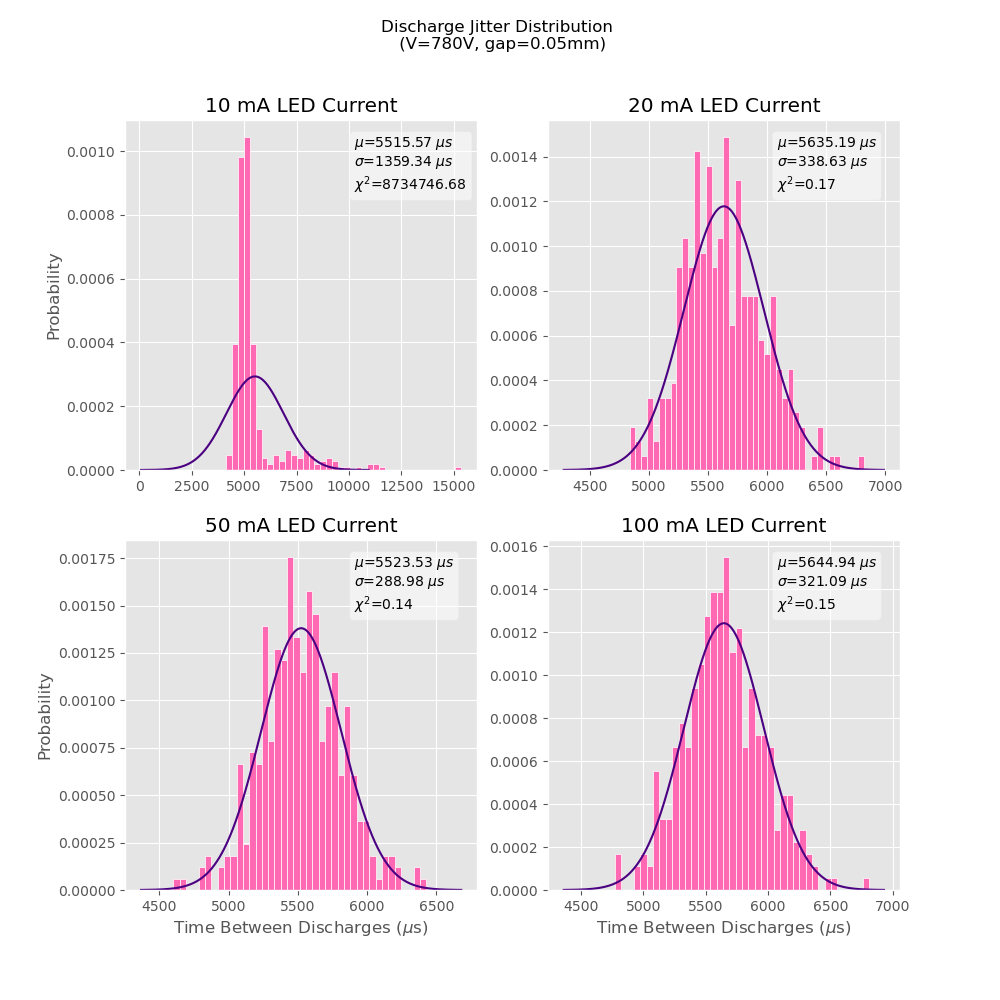

In [129]:
fig, axes = plt.subplots(2,2,figsize=(10,10))
fig.suptitle('Discharge Jitter Distribution \n (V=780V, gap=0.05mm)')


axes[0][0].set_title('10 mA LED Current')
axes[0][1].set_title('20 mA LED Current')
axes[1][0].set_title('50 mA LED Current')
axes[1][1].set_title('100 mA LED Current')

axes[0][0].plot(t_10,gauss_10,color='indigo')
axes[0][1].plot(t_20,gauss_20,color='indigo')
axes[1][0].plot(t_50,gauss_50,color='indigo')
axes[1][1].plot(t_100,gauss_100,color='indigo')

axes[0][0].hist(led10,density=True,color='hotpink',edgecolor='white',bins=40)
axes[0][1].hist(led20,density=True,color='hotpink',edgecolor='white',bins=40)
axes[1][0].hist(led50,density=True,color='hotpink',edgecolor='white',bins=40)
axes[1][1].hist(led100,density=True,color='hotpink',edgecolor='white',bins=40)

axes[0][0].text(0.65, 0.80, text10,transform=axes[0][0].transAxes,bbox=props)
axes[0][1].text(0.65, 0.80, text20,transform=axes[0][1].transAxes,bbox=props)
axes[1][0].text(0.65, 0.80, text50,transform=axes[1][0].transAxes,bbox=props)
axes[1][1].text(0.65, 0.80, text100,transform=axes[1][1].transAxes,bbox=props)

axes[0][0].set_ylabel('Probability')
axes[1][0].set_ylabel('Probability')

axes[1][0].set_xlabel(r'Time Between Discharges ($\mu$s)')
axes[1][1].set_xlabel(r'Time Between Discharges ($\mu$s)')

fig.savefig('Distributions.png')

In [130]:
sub_dirs

['G0.05mm_V780V_LED100mA7_29',
 'G0.05mm_V780V_LED20mA_take_27_29',
 'G0.05mm_V780V_LED20mA7_29',
 'G0.05mm_V780V_LED50mA7_29',
 'G0.05mm_V780V_LED10mA7_29']

In [136]:
#10, 20, 50, 100
data = [np.load(os.path.join(os.path.join(base_dir, sub_dirs[4]), 'trial_2.npy')),
        np.load(os.path.join(os.path.join(base_dir, sub_dirs[2]), 'trial_1.npy')),
        np.load(os.path.join(os.path.join(base_dir, sub_dirs[3]), 'trial_1.npy')),
        np.load(os.path.join(os.path.join(base_dir, sub_dirs[0]), 'trial_1.npy'))]

In [137]:
sub_dirs

['G0.05mm_V780V_LED100mA7_29',
 'G0.05mm_V780V_LED20mA_take_27_29',
 'G0.05mm_V780V_LED20mA7_29',
 'G0.05mm_V780V_LED50mA7_29',
 'G0.05mm_V780V_LED10mA7_29']

In [168]:
from analysis_functions import frames
from analysis_functions import rc_basic

In [169]:
#10,20,50,100
f = [frames(d[1],threshold=-300) for d in data]

In [170]:
dt = [(d[0][1] - d[0][0]) for d in data]
t = [
        [ 
            ( np.linspace(0, len(f[i][j]) * dt[i], len(f[i][j])) )
         for j in range(len(f[i])) ] 
    for i in range(len(f)) ]

In [171]:
from scipy.optimize import curve_fit

In [182]:
p0 = [800,0.0055,0]

fits = [
    np.array([
        curve_fit(rc_basic, t[i][j], f[i][j], p0=p0)[0]
    for j in range(1,len(f[i])) ]).transpose()
for i in range(len(f)) ]

/Users/liamkeeley/Desktop/Colorado_College/Physics/Plasma_Research_Summer_2022/Spark_Gap/Spark_Gap_Data_Collection/analysis_functions.py:33: RuntimeWarning: overflow encountered in exp
  return xi * (1 - np.exp(-(t-t_0) / tau))
/Users/liamkeeley/Desktop/Colorado_College/Physics/Plasma_Research_Summer_2022/Spark_Gap/Spark_Gap_Data_Collection/analysis_functions.py:33: RuntimeWarning: overflow encountered in multiply
  return xi * (1 - np.exp(-(t-t_0) / tau))


(array([ 1.,  0.,  0.,  0.,  0.,  1.,  1.,  2.,  0.,  0.,  0.,  5., 12.,
         8., 11., 11.,  8., 16., 13., 24., 32., 24., 29., 23., 30., 20.,
        15., 12., 10.,  4.]),
 array([0.00098772, 0.00098864, 0.00098956, 0.00099049, 0.00099141,
        0.00099233, 0.00099326, 0.00099418, 0.00099511, 0.00099603,
        0.00099695, 0.00099788, 0.0009988 , 0.00099973, 0.00100065,
        0.00100157, 0.0010025 , 0.00100342, 0.00100434, 0.00100527,
        0.00100619, 0.00100712, 0.00100804, 0.00100896, 0.00100989,
        0.00101081, 0.00101174, 0.00101266, 0.00101358, 0.00101451,
        0.00101543]),
 <BarContainer object of 30 artists>)

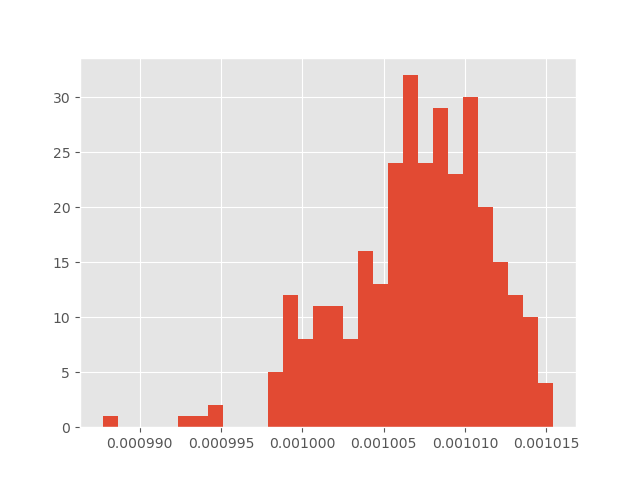

In [183]:
plt.figure()
plt.hist(fits[1][1],bins=30)

In [101]:


fit, conv = curve_fit(rc_basic,t,f50[100],p0=[800,0.005,f50[100].min()])
fit

array([7.45186913e+02, 1.00794482e-03, 7.30462406e+01])

In [102]:
f50[100].min()

40.201

40.201